In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from tensorflow.keras.models import Sequential, clone_model
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from LTH_helper import LTH
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras import initializers
from tensorflow.keras.datasets import fashion_mnist, mnist
from tensorflow_model_optimization.sparsity.keras import strip_pruning

In [128]:
my_dataset = mnist

In [121]:
(train_images, train_labels), (test_images, test_labels) = my_dataset.load_data()
X = train_images.reshape(-1, 784)/255
y = train_labels.reshape(-1, 1)
X_test = test_images.reshape(-1, 784)/255
y_test = test_labels.reshape(-1, 1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=42)

In [122]:
def compile_model(model, lr=0.001):
    optim = optimizers.Adam(lr=lr)
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
    
def get_model(compile_model_flag=True, lr=0.001):
    reduce = 2
    input_dim=784
    output_size = 10
    initializer = initializers.glorot_normal()
    # Creo el modelo
    model = Sequential()
    model.add(Dense(output_size, activation='softmax', 
                    name='Salida', input_dim=input_dim,
                    kernel_initializer=initializer))
    if compile_model_flag:
        compile_model(model, lr=lr)
    return model
model = get_model()
# model.save_weights('random-init.hdf5')
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Salida (Dense)               (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [129]:
if my_dataset == mnist:
    model.load_weights('MNIST-LR-best_untrained_acc_36.3_46.6.hdf5')
else:
    model.load_weights('F-MNIST-LR-best_untrained_acc_10.3_50.9.hdf5')

In [130]:
for i, layer in enumerate(model.layers):
    sparcity = (layer.get_weights()[0]==0).sum()/np.product((layer.get_weights()[0]==0).shape)    
    print(f'{layer.name}: {sparcity}')

Salida: 0.6360969387755102


In [131]:
X_test.shape

(10000, 784)

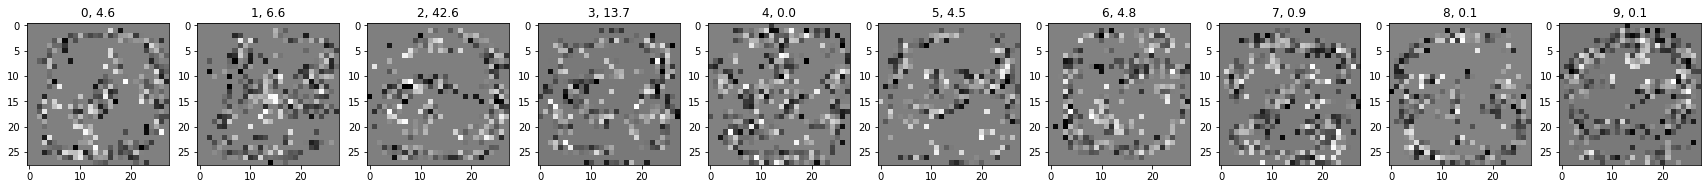

In [132]:
f, axs = plt.subplots(1, 10, figsize=(30, 10))
for number in range(10):
    w = model.get_weights()[0][:, number].reshape(28, 28)
    indexes = (y==number).reshape(-1)
    _, acc = model.evaluate(X[indexes], y[indexes], verbose=0)
    axs[number].imshow(w, cmap='gray')
    axs[number].set_title(f'{number}, {int(acc*1000+0.5)/10}')